In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os


In [30]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256), #New
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(), #New
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

"""
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. 
The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].
"""


'\nAll pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. \nThe images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].\n'

In [31]:
# Define the data directory
data_dir = 'dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
#image_datasets

In [32]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 3542, 'val': 489}


['alstonia_scholaris_diseased',
 'alstonia_scholaris_healthy',
 'arjun_diseased',
 'arjun_healthy',
 'bael_diseased',
 'basil_healthy',
 'chinar_diseased',
 'chinar_healthy',
 'gauva_diseased',
 'gauva_healthy',
 'jamun_diseased',
 'jamun_healthy',
 'jatropha_diseased',
 'jatropha_healthy',
 'lemon_diseased',
 'lemon_healthy',
 'mango_diseased',
 'mango_healthy',
 'pomegranate_diseased',
 'pomegranate_healthy',
 'pongamia_pinnata_diseased',
 'pongamia_pinnata_healthy']

In [33]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)


c:\Users\szymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\szymo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda


In [34]:
import datetime;
 
# ct stores current time
dt = datetime.datetime.now()
TIMESTAMP = f'{dt.day}{dt.month}_{dt.hour}{dt.minute}'

num_epochs = 50
NAME = f'N'
FULLNAME = f'{NAME}{num_epochs}E_{TIMESTAMP}'


try: 
    os.mkdir('Models') 
except OSError as error: 
    print(error)     

[WinError 183] Nie można utworzyć pliku, który już istnieje: 'Models'


In [35]:
print(f'{num_epochs = }')

num_epochs = 50


In [36]:
# Training loop
list_epoch_loss_t = []
list_epoch_acc_t = []
list_epoch_loss_v = []
list_epoch_acc_v = []

for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        if phase == 'train':
            list_epoch_loss_t.append(epoch_loss)
            list_epoch_acc_t.append(float(f'{epoch_acc}'))
        else:
            list_epoch_loss_v.append(epoch_loss)
            list_epoch_acc_v.append(float(f'{epoch_acc}'))

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    
    #Adding sub epoch models
    if num_epochs > 50 and epoch == 49:
        localname = f'{NAME}50E_{TIMESTAMP}'
        torch.save(model.state_dict(), f'Models/{FULLNAME}.pth')
    if num_epochs > 20 and epoch == 19:
        localname = f'{NAME}20E_{TIMESTAMP}'
        torch.save(model.state_dict(), f'Models/{FULLNAME}.pth')
    if num_epochs > 10 and epoch == 9:
        localname = f'{NAME}10E_{TIMESTAMP}'
        torch.save(model.state_dict(), f'Models/{FULLNAME}.pth')
        


print("Training complete!")


train Loss: 2.5963 Acc: 0.3131
val Loss: 1.1816 Acc: 0.5992
train Loss: 1.5426 Acc: 0.5288
val Loss: 0.7105 Acc: 0.7587
train Loss: 1.2971 Acc: 0.5982
val Loss: 0.6554 Acc: 0.7791
train Loss: 1.2046 Acc: 0.6268
val Loss: 0.6377 Acc: 0.7853
train Loss: 1.1160 Acc: 0.6513
val Loss: 0.5201 Acc: 0.8221
train Loss: 1.0937 Acc: 0.6550
val Loss: 0.6092 Acc: 0.7894
train Loss: 0.9922 Acc: 0.6793
val Loss: 0.5693 Acc: 0.7832
train Loss: 0.9923 Acc: 0.6821
val Loss: 0.5241 Acc: 0.8119
train Loss: 1.0140 Acc: 0.6832
val Loss: 0.5388 Acc: 0.8160
train Loss: 0.9901 Acc: 0.6934
val Loss: 0.4139 Acc: 0.8384
train Loss: 0.9264 Acc: 0.7081
val Loss: 0.4663 Acc: 0.8446
train Loss: 0.9297 Acc: 0.7044
val Loss: 0.4671 Acc: 0.8405
train Loss: 0.9248 Acc: 0.7055
val Loss: 0.5303 Acc: 0.8200
train Loss: 0.9233 Acc: 0.7126
val Loss: 0.4846 Acc: 0.8221
train Loss: 0.9476 Acc: 0.7016
val Loss: 0.4657 Acc: 0.8282
train Loss: 0.9303 Acc: 0.7067
val Loss: 0.4889 Acc: 0.8425
train Loss: 0.8761 Acc: 0.7247
val Loss:

In [37]:

# Save the model
torch.save(model.state_dict(), f'Models/{FULLNAME}.pth')


Train Loss: [2.5963124890134943, 1.5425778308000893, 1.2970884447882634, 1.2046066072955097, 1.1159591029073679, 1.0936878123722933, 0.9921555190159398, 0.9922884889977722, 1.0140201654653305, 0.9901491921270957, 0.9264080938896273, 0.9297273247594772, 0.9247991923402673, 0.9233448894106521, 0.9475840604104173, 0.9302894210748959, 0.8760739400181425, 0.8907824393660503, 0.8614616101714958, 0.8548902662703373, 0.9033643182420725, 0.9038515156560921, 0.8927728454274757, 0.8571846611345032, 0.8581578126371765, 0.8623731647013886, 0.8347344998936029, 0.8423606179862845, 0.8634778740255763, 0.8844938239557032, 0.844810481428814, 0.8757856132400568, 0.8418263104622778, 0.8384441739265853, 0.8589771519683802, 0.8966825569478689, 0.8230286943513263, 0.8473817022303819, 0.8224004251365237, 0.8557086577770452, 0.8615701646001863, 0.8914264336203128, 0.8415292566899844, 0.873235879647364, 0.8838003428841146, 0.8183881023962878, 0.8428378227692179, 0.835096009532626, 0.8397175749794873, 0.85235466

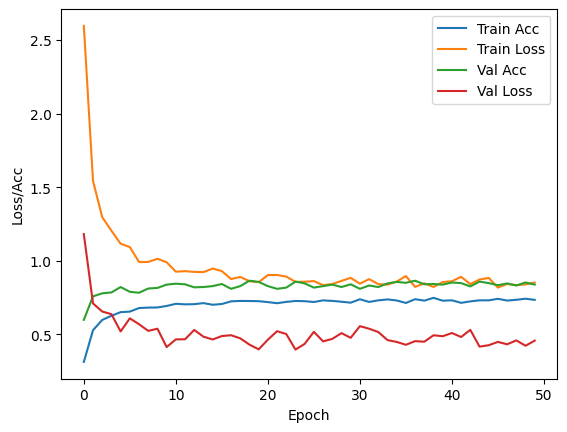

In [38]:
import matplotlib.pyplot as plt
import numpy as np

print(f"Train Loss: {list_epoch_loss_t}")
print(f"Train Acc: {list_epoch_acc_t}")
print(f"Val Loss: {list_epoch_loss_v}")
print(f"Val Acc: {list_epoch_acc_v}")

file = open(f"Models/{FULLNAME}.txt", "a")  # append mode
file.write(f"Train Loss: {list_epoch_loss_t}\n")
file.write(f"Train Acc: {list_epoch_acc_t}\n")
file.write(f"Val Loss: {list_epoch_loss_v}\n")
file.write(f"Val Acc: {list_epoch_acc_v}\n")
file.close()

plt.figure()
plt.plot(list_epoch_acc_t, label='Train Acc')
plt.plot(list_epoch_loss_t, label='Train Loss')
plt.plot(list_epoch_acc_v, label='Val Acc')
plt.plot(list_epoch_loss_v, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss/Acc')
plt.legend()

plt.savefig(f'Models/{FULLNAME}.png')

# Classification on Unseen Image

To use the saved model to classify unseen images, you need to load the model and then apply it to the new images for inference. 

In [39]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import os

#To use other model than just learnt, change MYMODEL to it's name 
MYMODEL = ''

MODELNAME = MYMODEL if MYMODEL != '' else FULLNAME
print(MODELNAME)

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load(f'Models/{MODELNAME}.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]

# Map the predicted class to the class name
class_names = ['alstonia_scholaris_diseased',
 'alstonia_scholaris_healthy',
 'arjun_diseased',
 'arjun_healthy',
 'bael_diseased',
 'basil_healthy',
 'chinar_diseased',
 'chinar_healthy',
 'gauva_diseased',
 'gauva_healthy',
 'jamun_diseased',
 'jamun_healthy',
 'jatropha_diseased',
 'jatropha_healthy',
 'lemon_diseased',
 'lemon_healthy',
 'mango_diseased',
 'mango_healthy',
 'pomegranate_diseased',
 'pomegranate_healthy',
 'pongamia_pinnata_diseased',
 'pongamia_pinnata_healthy']

N50E_2112_015


Prepare your new image for classification. You should use the same data transformations you used during training. Here's an example of how to prepare an image for inference:

In [40]:
folders = os.listdir("dataset/test")

SHOWIMAGE = False

counter = 0
correct = 0
correct_leaf = 0
wrong = 0
wrong_leaf = 0

for folder in folders:
    files = os.listdir("dataset/test/"+folder)
    print(f'{folder}')
    print(f'{files=}')
    print(f'{len(files)=}')
    for file in files:
        # Load and preprocess the unseen image
        image_path = "dataset/test/"+folder+"/"+file  # Replace with the path to your image
        image = Image.open(image_path)
        preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        input_tensor = preprocess(image)
        input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension


        #Perform inference using the model:
        with torch.no_grad():
            output = model(input_batch)

        # Get the predicted class
        _, predicted_class = output.max(1)

        predicted_class_name = class_names[predicted_class.item()]

        counter += 1
        if predicted_class_name == folder:
            correct += 1
            #print(f'The predicted class is: {predicted_class_name}')
        else:
            wrong += 1
            print(f'The predicted class is: {predicted_class_name} should be {folder}')
            
        if predicted_class_name.replace('_healthy', '').replace('_diseased', '') == folder.replace('_healthy', '').replace('_diseased', ''):
            correct_leaf += 1
            #print(f'The predicted class is: {predicted_class_name}')
        else:
            wrong_leaf += 1
        
        if SHOWIMAGE:
            # Display the image with the predicted class name
            image = np.array(image)
            plt.imshow(image)
            plt.axis('off')
            plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
            plt.show()
        
    


alstonia_scholaris_diseased
files=['0014_0230.JPG', '0014_0231.JPG', '0014_0232.JPG', '0014_0233.JPG', '0014_0234.JPG', '0014_0235.JPG', '0014_0236.JPG', '0014_0237.JPG', '0014_0238.JPG', '0014_0239.JPG', '0014_0240.JPG', '0014_0241.JPG', '0014_0242.JPG', '0014_0243.JPG', '0014_0244.JPG', '0014_0245.JPG', '0014_0246.JPG', '0014_0247.JPG', '0014_0248.JPG', '0014_0249.JPG', '0014_0250.JPG', '0014_0251.JPG', '0014_0252.JPG', '0014_0253.JPG', '0014_0254.JPG']
len(files)=25
The predicted class is: jamun_diseased should be alstonia_scholaris_diseased
The predicted class is: alstonia_scholaris_healthy should be alstonia_scholaris_diseased
alstonia_scholaris_healthy
files=['0003_0162.JPG', '0003_0163.JPG', '0003_0164.JPG', '0003_0165.JPG', '0003_0166.JPG', '0003_0167.JPG', '0003_0168.JPG', '0003_0169.JPG', '0003_0170.JPG', '0003_0171.JPG', '0003_0172.JPG', '0003_0173.JPG', '0003_0174.JPG', '0003_0175.JPG', '0003_0176.JPG', '0003_0177.JPG', '0003_0178.JPG', '0003_0179.JPG']
len(files)=18
The pr

In [41]:

print(f'{counter = }')
print(f'{correct = }')
print(f'{wrong = }')
print(f'{correct_leaf = }')
print(f'{wrong_leaf = }')
print(f'Acc: {correct*100/counter:.2f}%')
print(f'Leaf Acc: {correct_leaf*100/counter:.2f}%')

file = open(f"Models/{MODELNAME}_Results.txt", "a")  # append mode
file.write(f'{counter = }\n')
file.write(f'{correct = }\n')
file.write(f'{wrong = }\n')
file.write(f'{correct_leaf = }\n')
file.write(f'{wrong_leaf = }\n')
file.write(f'Acc: {correct*100/counter:.2f}%\n')
file.write(f'Leaf Acc: {correct_leaf*100/counter:.2f}%\n')
file.close()


counter = 471
correct = 391
wrong = 80
correct_leaf = 432
wrong_leaf = 39
Acc: 83.01%
Leaf Acc: 91.72%


In [42]:
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics

# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)

# confusion_matrix = metrics.confusion_matrix(actual, predicted)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()